# Import functions

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Import other python script functions

In [2]:
from data_cleaning import clean_raw_data

# Import resale flat price data

In [5]:
df_raw = pd.read_csv('data/resale_flat_prices.csv')
df_raw

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
164315,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,63 years 06 months,829000.0
164316,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0
164317,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0
164318,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0


In [ ]:
df_clean = clean_raw_data(df_raw)

# EDA

In [66]:
avg_resale_price_aggregates = df_raw.groupby(['flat_type', 'town']).agg(avg_resale_price = ('resale_price', 'mean')).reset_index()

In [67]:
avg_resale_price_aggregates

,flat_type,town,avg_resale_price
0,1 ROOM,BUKIT MERAH,197647.677419
1,2 ROOM,ANG MO KIO,237506.163934
2,2 ROOM,BEDOK,241325.728070
3,2 ROOM,BUKIT BATOK,335120.000000
4,2 ROOM,BUKIT MERAH,270650.447917
...,...,...,...
126,EXECUTIVE,WOODLANDS,668651.103181
127,EXECUTIVE,YISHUN,654459.690128
128,MULTI-GENERATION,BISHAN,908171.636364
129,MULTI-GENERATION,TAMPINES,804299.478261


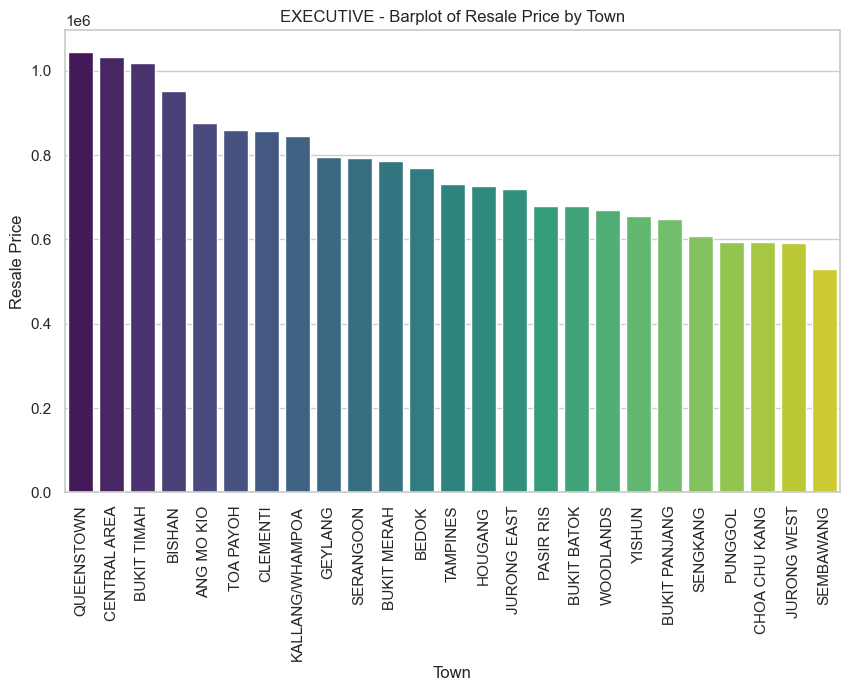

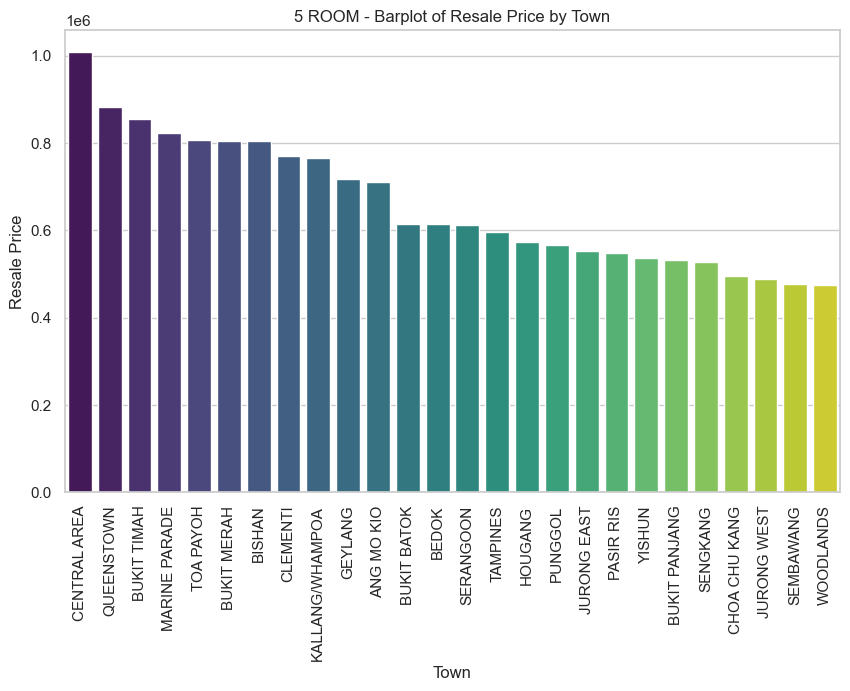

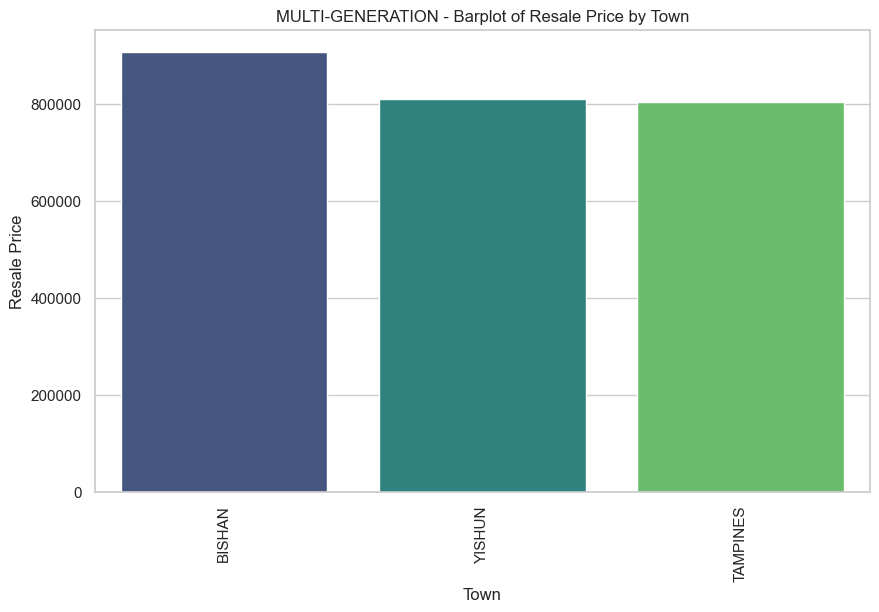

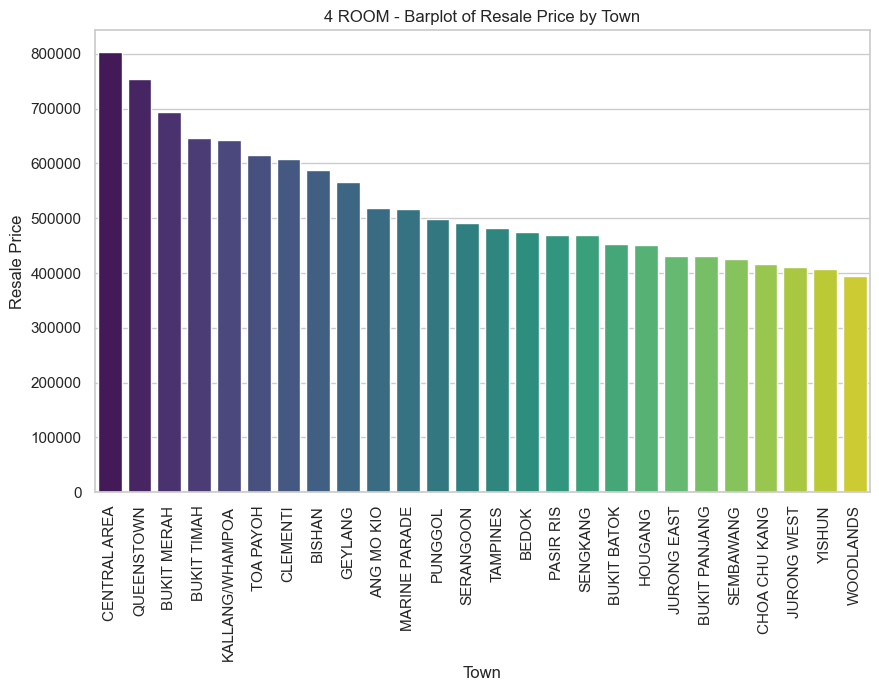

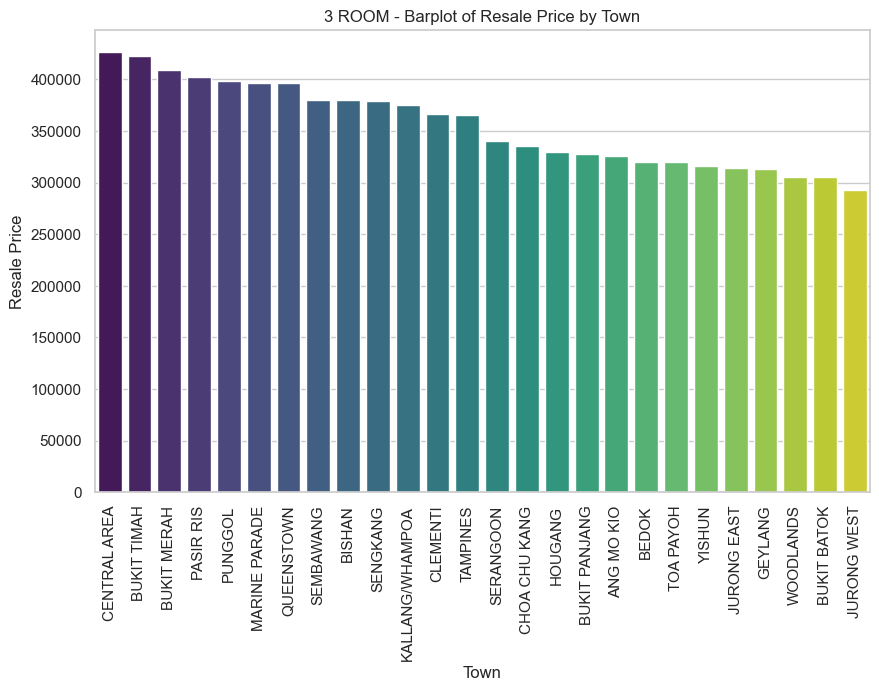

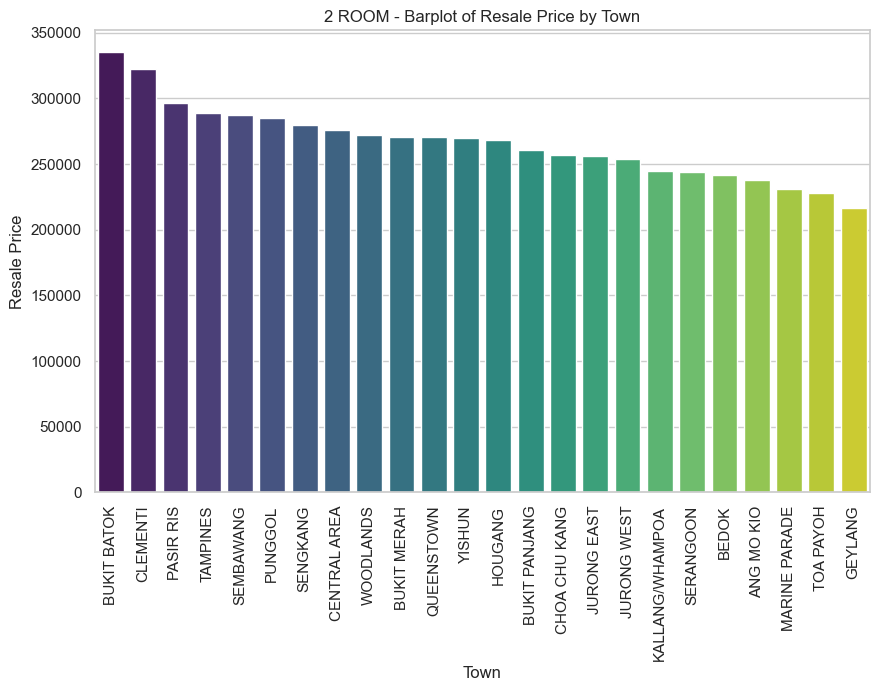

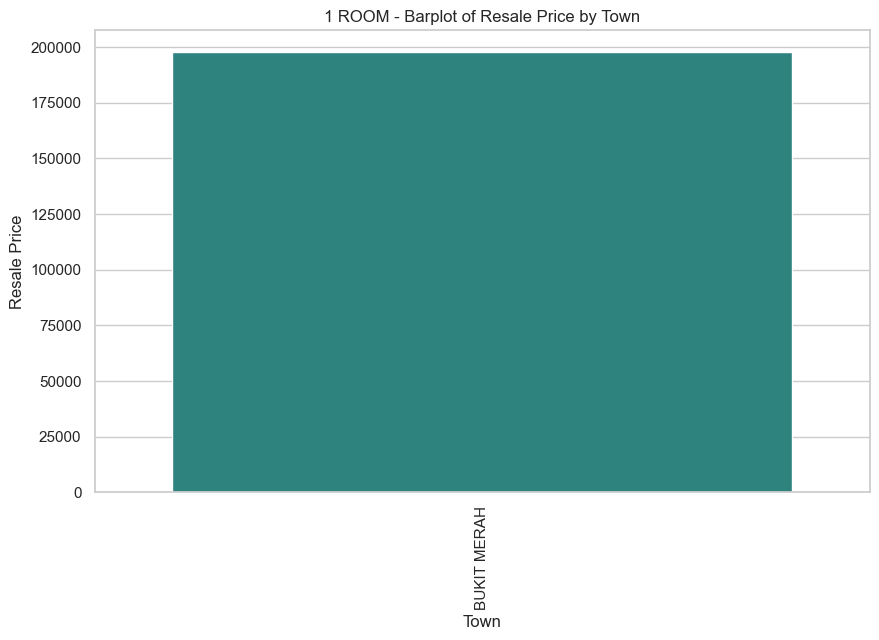

In [68]:
unique_flat_type = list(df_clean.flat_type.unique())
unique_flat_type

for flat_type in unique_flat_type:
    df = avg_resale_price_aggregates.loc[df_clean['flat_type'] == flat_type]
    
    # Set the style of seaborn for better aesthetics
    sns.set(style="whitegrid")

    # Create a barplot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.barplot(x='town', y='avg_resale_price', data=df, order=df.sort_values('avg_resale_price', ascending=False)['town'], palette='viridis')

    # Set labels and title
    plt.xlabel('Town')
    plt.ylabel('Resale Price')
    plt.title(f'{flat_type} - Barplot of Resale Price by Town')
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

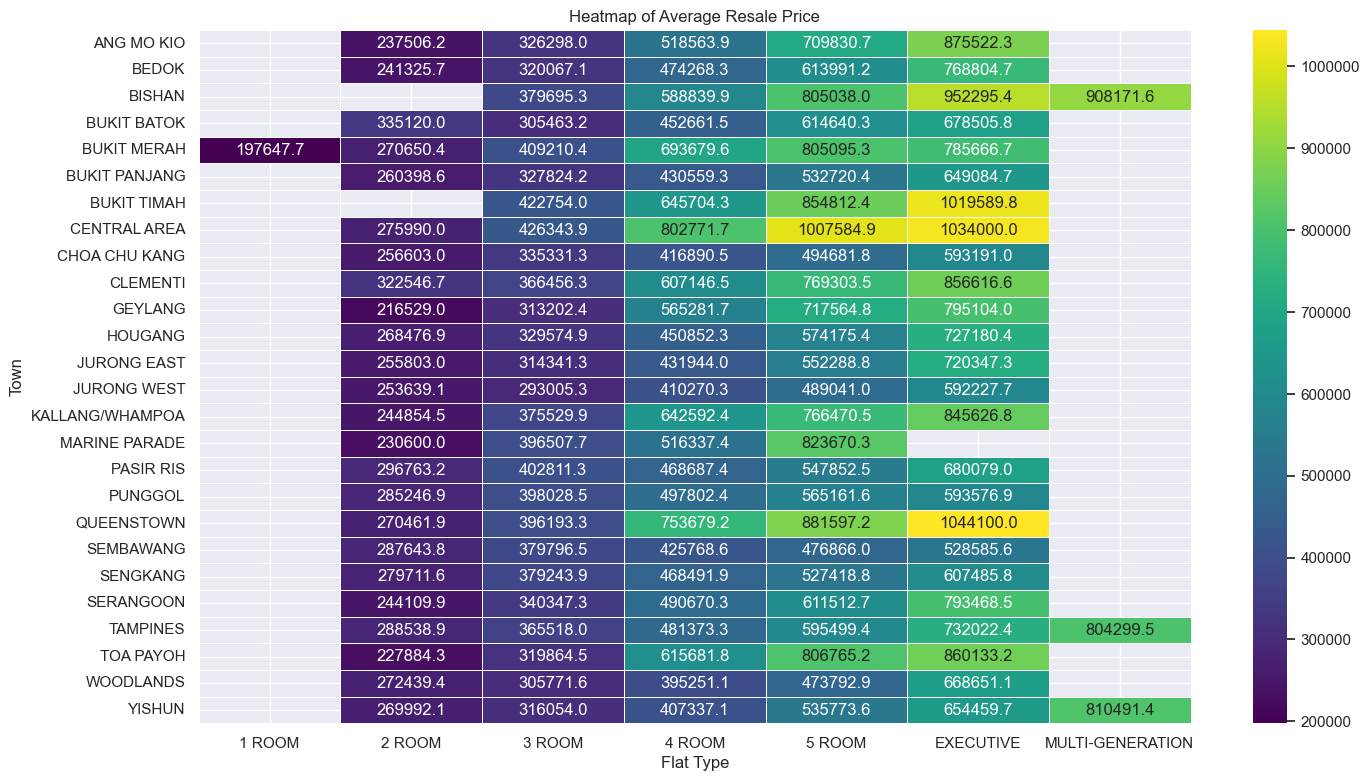

In [69]:
# Pivot the DataFrame for the heatmap
heatmap_data = avg_resale_price_aggregates.pivot_table(index='town', columns='flat_type', values='avg_resale_price')

# Set the style of seaborn for better aesthetics
sns.set()

# Create a heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=.5, cbar_kws={'format': '%.0f'})

# Set labels and title
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.title('Heatmap of Average Resale Price')

# Show the plot
plt.show()